In [1001]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import copy

In [1002]:
def hist_cdf(img, title):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    plt.subplot(2, 1, 1)
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title(f"{title}")
    plt.show()

In [1003]:
def white_field(img):
    h, w = img.shape
    fh = int(h / 8)
    fw = int(w / 8)  

    white_fields = []
    x = 0
    plt.figure(figsize=(8, 8))

    for i in range(8):
        for j in range(8):
            # Wycięcie aktualnego pola
            field = img[i*fh:(i+1)*fh, j*fw:(j+1)*fw]
            # plt.subplot(8, 8, i*8 + j + 1)
            # plt.imshow(field, "gray")
            # plt.axis('off')

            mean_intensity = np.mean(field)
            if(mean_intensity > 100):
            # x = x + 1
            # print(str(x) + " mean = " + str(mean_intensity))
            # print(str(i*fh) + ":" + str((i+1)*fh) + " - " + str(j*fw) + ":" + str((j+1)*fw))
                cv2.rectangle(img, (i*fh,j*fw ), ((i+1)*fh, (j+1)*fw), (255,255, 255), -1 )
                white_fields.append(((i*fh, (i+1)*fh), (j*fw, (1+j)*fw)))     
    plt.imshow(img, "gray")
    return white_fields
# int(h*0.01/2)

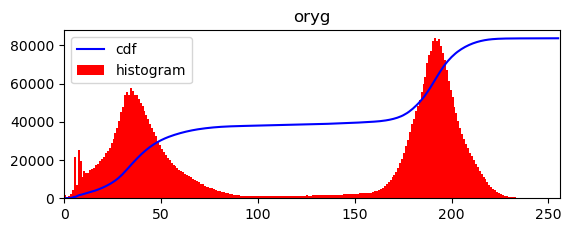

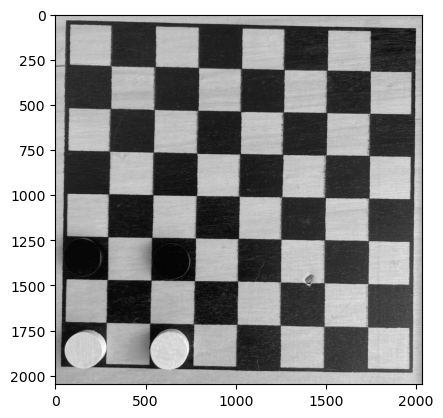

In [1004]:
img = cv2.imread("./photo/only_checkboard.jpg", cv2.IMREAD_GRAYSCALE )

h, w = img.shape
h = h/8
w = w/8

hist_cdf(img, "oryg")
plt.imshow(img, "gray")





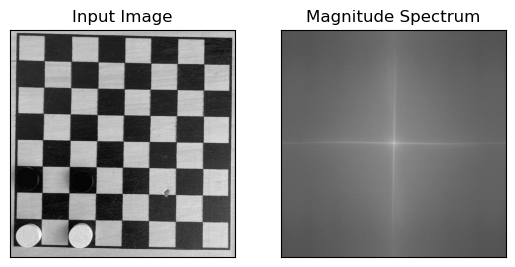

In [1005]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Biale pola (indeksy i, j): [((0, 256), (0, 254)), ((0, 256), (508, 762)), ((0, 256), (1016, 1270)), ((0, 256), (1524, 1778)), ((256, 512), (254, 508)), ((256, 512), (762, 1016)), ((256, 512), (1270, 1524)), ((256, 512), (1778, 2032)), ((512, 768), (0, 254)), ((512, 768), (508, 762)), ((512, 768), (1016, 1270)), ((512, 768), (1524, 1778)), ((768, 1024), (254, 508)), ((768, 1024), (762, 1016)), ((768, 1024), (1270, 1524)), ((768, 1024), (1778, 2032)), ((1024, 1280), (0, 254)), ((1024, 1280), (508, 762)), ((1024, 1280), (1016, 1270)), ((1024, 1280), (1524, 1778)), ((1280, 1536), (254, 508)), ((1280, 1536), (762, 1016)), ((1280, 1536), (1270, 1524)), ((1280, 1536), (1524, 1778)), ((1280, 1536), (1778, 2032)), ((1536, 1792), (0, 254)), ((1536, 1792), (508, 762)), ((1536, 1792), (1016, 1270)), ((1536, 1792), (1270, 1524)), ((1536, 1792), (1524, 1778)), ((1536, 1792), (1778, 2032)), ((1792, 2048), (0, 254)), ((1792, 2048), (254, 508)), ((1792, 2048), (508, 762)), ((1792, 2048), (762, 1016)), 

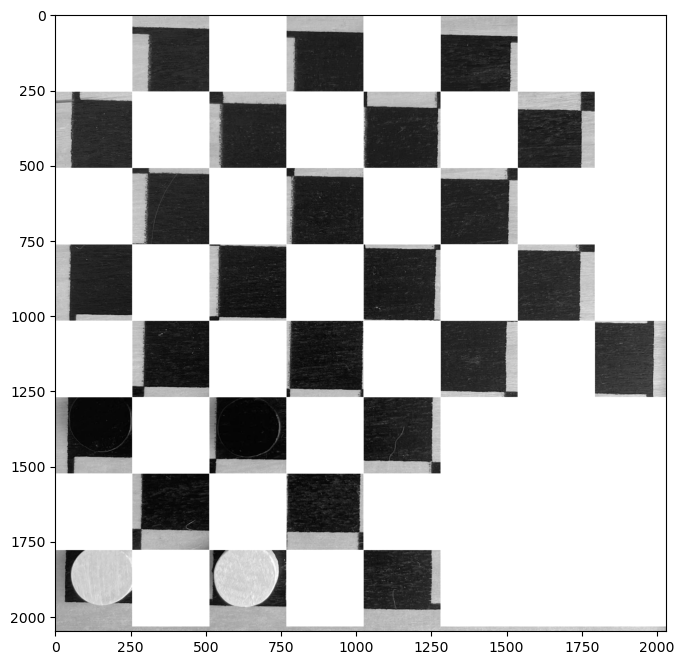

In [1006]:
img_c = copy.deepcopy(img)
white_fields = white_field(img_c)

print("Biale pola (indeksy i, j):", white_fields)
print(len(white_fields))

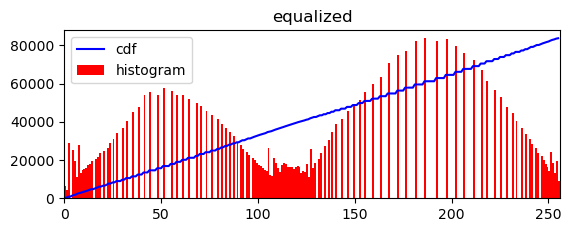

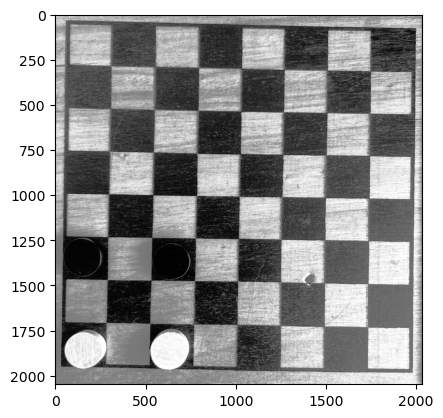

In [1007]:

equalized = cv2.equalizeHist(img)


hist_cdf(equalized, "equalized")
plt.imshow(equalized, "gray")


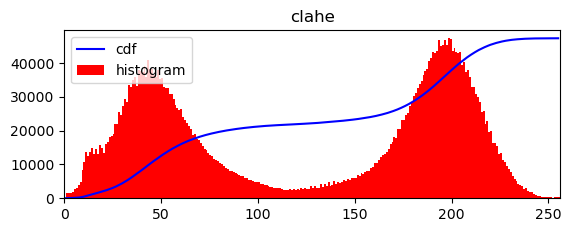

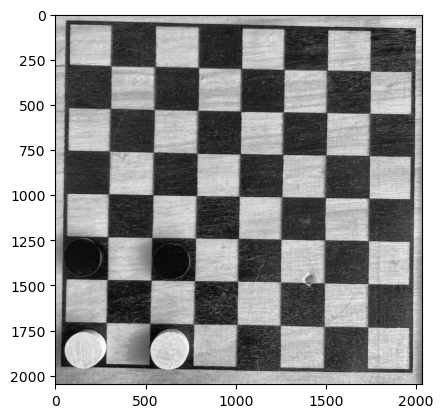

In [1008]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_img = clahe.apply(img)


hist_cdf(enhanced_img, "clahe")
plt.imshow(enhanced_img, "gray")

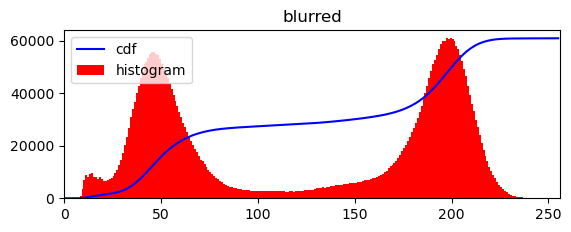

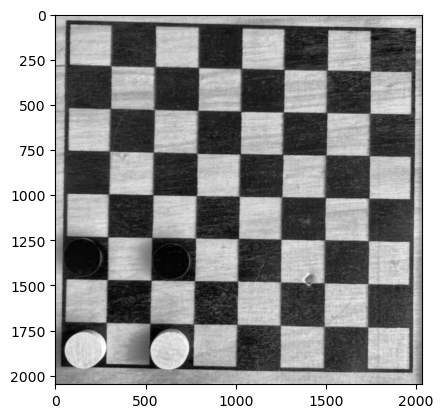

In [1009]:
blurred = cv2.GaussianBlur(enhanced_img , (11, 11), 2) # sigma 2 better remove noise but also  remove edges

hist_cdf(blurred, "blurred")
plt.imshow(blurred, "gray")

In [1010]:
# img_median = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv2.THRESH_BINARY,11,2)
# plt.imshow(img_median, "gray")


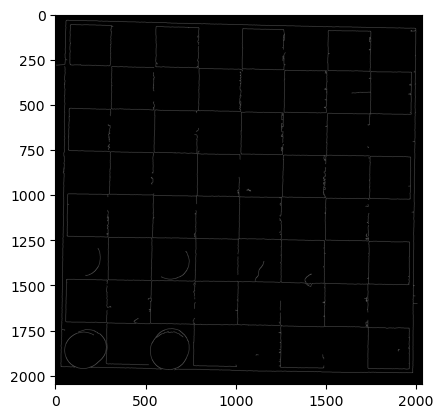

In [1011]:
edges = cv2.Canny(blurred, 50, 150)
# th2 = cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv2.THRESH_BINARY,11,2)
plt.imshow(edges, cmap="gray")



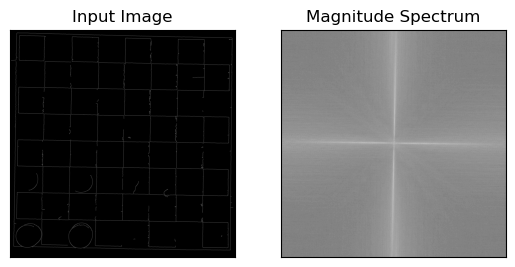

In [1012]:
f = np.fft.fft2(edges)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
 
plt.subplot(121),plt.imshow(edges, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Image after HPF'), ([], []), ([], []))

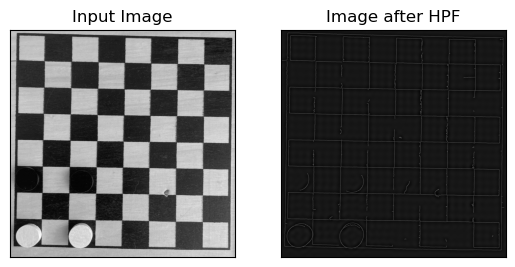

In [1013]:
rows, cols = img.shape
crow, ccol = rows//2, cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])



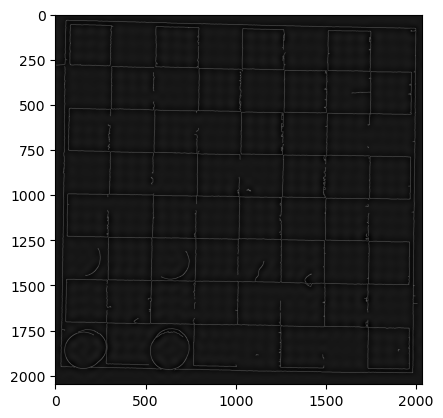

In [1014]:
plt.imshow(img_back, "gray")

In [1015]:
# edges = cv2.Canny(img_median
# , 50, 150)
# # th2 = cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
# #             cv2.THRESH_BINARY,11,2)
# plt.imshow(edges, cmap="gray")

In [1016]:
# ret,thresh1 = cv2.threshold(blurred, 110,255,cv2.THRESH_BINARY)
# plt.imshow(thresh1, cmap="gray")


In [1017]:
kernel = cv2.getStructuringElement(cv2.MORPH_OPEN,(5,5))# opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
# plt.imshow(opening, cmap="gray")
print(kernel)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


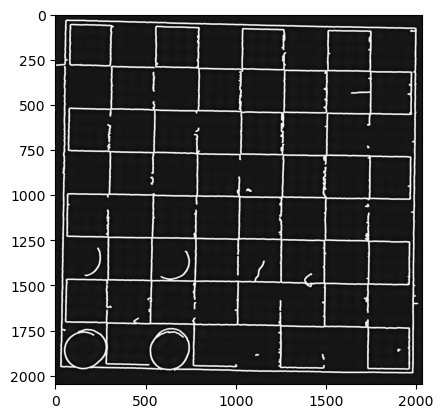

In [1018]:
dilation = cv2.dilate(img_back, kernel,iterations = 2)
plt.imshow(dilation, cmap="gray")

In [1019]:
print(dilation.shape)

(2048, 2032)


In [1020]:
# opening = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)
# plt.imshow(opening, cmap="gray")
# cv2.Mat(dilation)
# print(dilation)


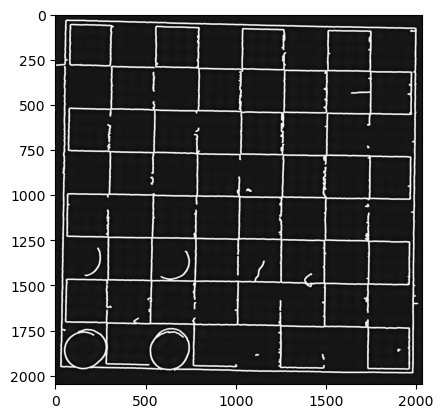

In [1021]:
plt.imshow(dilation, "gray")

float64
uint8
float64


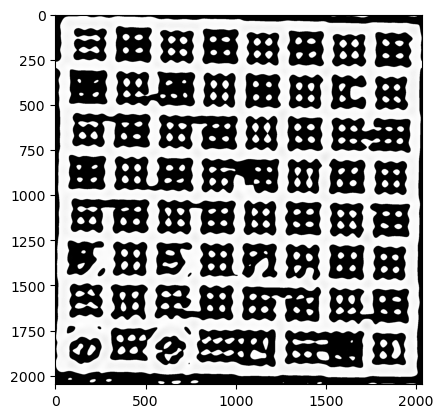

In [1022]:
# opening = cv2.erode(dilation, kernel,iterations = 2 )
# plt.imshow(opening, cmap="gray")
print(dilation.dtype)
dilation = dilation.astype(np.uint8)  # Konwersja do 8-bitowego formatu
print(dilation.dtype)
print(img_back.dtype)
img_back = img_back.astype(np.uint8)
plt.imshow(img_back, "gray")


uint8
3


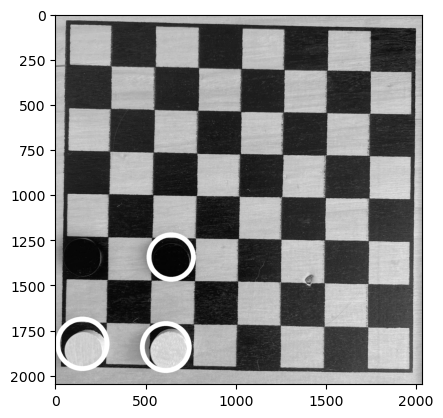

In [1023]:
rmin = (h/2 - h*0.05)
rmax = (h/2 + h*0.05)
# dilation = cv2.cvtColor(dilation, cv2.COLOR_BGR2GRAY)

print(edges.dtype)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100,
                           param1=50, param2=30, minRadius=int(rmin),
                           maxRadius=int(rmax))

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (255, 255, 255), int(0.1*h))

plt.imshow(img, "gray")
print(len(circles))

In [1024]:
print(dilation.shape)

(2048, 2032)


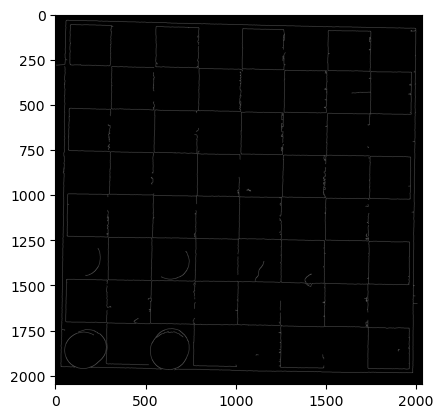

In [1025]:
plt.imshow(edges, "gray")
